# Corrections vs Crime

### Hypothesis

We can predict the crime level using the amount spent on corrections

In [1]:
# dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Assemble Data

In [2]:
# load corrections data
corrections_path = os.path.join('data', 'corrections', 'corrections_all.csv')
corrections_df = pd.read_csv(corrections_path)
corrections_df.set_index('State', inplace=True)
corrections_df.rename(columns={'Total':'Total Corrections Spending'}, inplace=True)
corrections_df.head()

,Total Corrections Spending,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
State,,,,,,,,,,,,,,,,,,,,,
2000,35129203,278856,173624,719690,275158,4244680,689090,555449,228076,2218703,...,62831,449107,2766911,245401,66127,1123734,731277,156190,837496,73469
2001,38164541,303759,172610,760323,290520,5313697,704421,604890,247987,2248117,...,66745,491727,3074359,265689,71988,1247296,730116,122009,932819,80018
2002,38887742,331476,173844,733455,284600,5596427,734457,637897,245203,2199630,...,69673,529747,3157124,267607,79771,1243090,735214,170305,965801,83268
2003,39187839,356928,182046,731041,305803,5690346,723572,615670,206085,2141271,...,79858,558669,3201068,261283,81767,1194241,786781,182064,906725,89551
2004,39313812,397943,176642,790485,351786,5875717,701710,558043,202782,2185039,...,61675,596095,2972593,275912,93827,1215898,796810,182906,918706,91003


In [3]:
# load crime data
# crime_path = os.path.join('data', 'crime', 'crime_rate_per_100_all.csv')
crime_path = os.path.join('data', 'crime', 'crime_all.csv')
crime_df = pd.read_csv(crime_path)
crime_df = crime_df.drop(crime_df.index[11])
crime_df.set_index('State', inplace=True)
crime_df['Total Crime'] = crime_df.sum(axis=1)
crime_df

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,FLORIDA,GEORGIA,...,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,Total Crime
State,,,,,,,,,,,,,,,,,,,,,
2000,202159,26641,299092,110019,1266714,171304,110091,35090,910154,388949,...,278218,1033311,99958,18185,214348,300932,47067,172124,16285,11564125
2001,192835,26895,322549,111296,1346557,186379,106791,32267,913230,389543,...,295770,1098809,96307,16978,228445,308492,46120,179410,17392,11804921
2002,200331,27745,348467,112672,1384872,195936,103719,31803,905957,385830,...,290961,1130292,103129,15600,229039,309931,45320,176987,17858,11831419
2003,201572,28130,342973,111141,1420637,195046,101537,33046,881976,408923,...,296010,1138623,105207,14303,220106,312820,47375,169842,17962,11775044
2004,201664,26331,335699,124201,1425264,197527,102078,30992,850895,416873,...,295147,1132256,103246,15039,220227,322167,50421,158258,18052,11660778
2005,197071,28169,317823,127434,1390709,206947,99429,31577,838955,419259,...,299839,1111384,101158,14956,221044,329406,52653,160646,17242,11522689
2006,200578,28765,316286,127027,1350137,182670,97605,34988,849879,408289,...,295204,1080838,95393,15231,210974,308653,52759,172354,16584,11365478
2007,204530,27617,310394,127068,1299685,163047,93017,35103,878227,419417,...,298104,1107196,98804,15202,211007,282275,50740,175255,16235,11214590
2008,211454,24598,307979,123882,1265920,157671,96514,37444,885199,435319,...,296142,1093134,97943,16615,215516,267839,51575,170548,15710,11111207


In [4]:
df = pd.merge(crime_df, corrections_df, right_index=True, left_index=True)
df = df[['Total Corrections Spending', 'Total Crime']]
df

,Total Corrections Spending,Total Crime
State,,
2000,35129203,11564125
2001,38164541,11804921
2002,38887742,11831419
2003,39187839,11775044
2004,39313812,11660778
2005,40689366,11522689
2006,42720103,11365478
2007,46497875,11214590
2008,49897531,11111207


In [5]:
# Assign the data to X and y
X = df['Total Corrections Spending'].values.reshape(-1,1)
y = df['Total Crime'].values.reshape(-1,1)

print(X.shape, y.shape)

(11, 1) (11, 1)


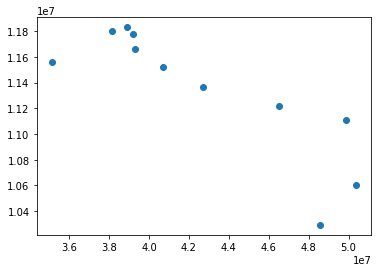

In [6]:
# Plot corrections and crime rate and check for linear data
plt.scatter(X, y)

# Linear Regression

In [7]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
# Create the model using LinearRegression
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [9]:
# Get linear model
coefficient = model.coef_
y_intercept = model.intercept_
print('Weight coefficients: ', coefficient)
print('y-axis intercept: ', y_intercept) 

Weight coefficients:  [[-0.08070119]]
y-axis intercept:  [ 14784383.53441665]


Linear model: y = 14784383.53441665 - 0.08070119x

In [10]:
# Make predictions
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [11564125]
Predicted output: [ 11949415.19019987]
Prediction Error: [ 385290.19019987]


In [11]:
# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 65573018887.239044
R-squared (R2 ): 0.7163633525205698


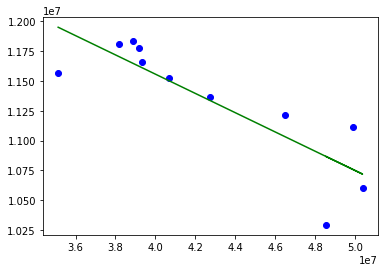

In [12]:
# show the model fit by plotting the predicted values against the original data
plt.scatter(X, y, c='blue')
plt.plot(X, predictions, 'green')

# Validation

In [13]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
# Fit the model to the training data and calculate the overall scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7354879158207688
Testing Score: 0.4758446474342622


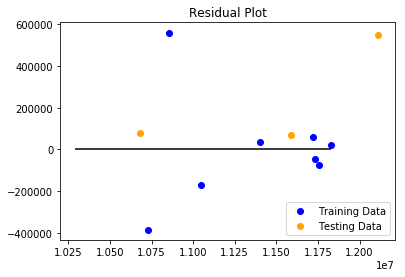

In [16]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [17]:
y_train.shape

(8, 1)

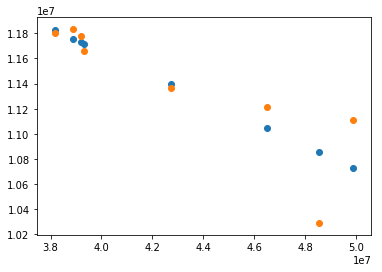

In [18]:
plt.scatter(X_train, model.predict(X_train))
plt.scatter(X_train, y_train)

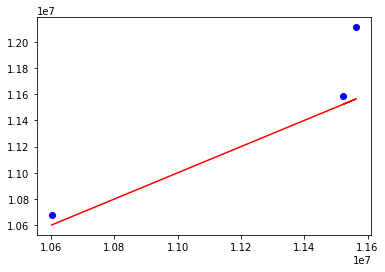

In [19]:
# Make predictions using the X_test data
# Plot y_test vs y_test
# Scatter plot y_test vs predictions
##### FROM 21-1-9??

predictions = model.predict(X_test)
plt.scatter(y_test, predictions, c='blue')
plt.plot(y_test, y_test, c='red')
plt.show()

In [20]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 103194567324.07147, R2: 0.4758446474342622


In [21]:
# Get linear model
coefficient = model.coef_
y_intercept = model.intercept_
print('Weight coefficients: ', coefficient)
print('y-axis intercept: ', y_intercept) 

Weight coefficients:  [[-0.09379003]]
y-axis intercept:  [ 15405791.62405374]


Linear model: y = 15405791.62405374 - 0.09379003x